# ▶️ YouTube Video Analysis
### Author: Aston Crawley

In [1]:
# ============== 1. Setup ==============
# Import libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
import emoji
from collections import Counter
import plotly.graph_objects as go
from plotly.offline import iplot

In [2]:
# ============== 2. Data Loading ==============
# Load YouTube US comments data skipping corrupted rows
df = pd.read_csv(os.path.join("..", "data", "UScomments.csv"), on_bad_lines = "skip")

/var/folders/kh/hv0681hd5n1bnsmh2y16qm3h0000gn/T/ipykernel_36078/3473035399.py:3: DtypeWarning:

Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
# Preview data
print(df.head())
print(df.info())
print(df.describe())

      video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691400 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691400 non-null  object
 1   comment_text  691374 non-null  object
 2   likes         691400 non-null  object
 3   replies       691400 non-null  object
dtypes: object(4)
memory usage: 21.1+ MB
None
           video_id comment_text   likes  replies
count        

In [4]:
# ============== 3. Data Cleaning ==============
# Check for missing values
print(df.isnull().values.any())

# Check location and quantity of missing values
print(df.isnull().sum())

# Handle missing values
df.dropna(inplace = True)

True
video_id         0
comment_text    26
likes            0
replies          0
dtype: int64


In [5]:
# ============== 4. Exploratory Data Analysis (EDA) ==============
# Sentiment analysis
sia = SentimentIntensityAnalyzer()

# Generate comment polarity score
df['polarity'] = df['comment_text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

In [6]:
df.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.4648
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0000


In [7]:
# Wordcloud analysis

# Get positive comments based on polarity score
filter_pos = df['polarity'] >= 0.8
comments_pos = df[filter_pos]
comments_pos.shape

(91912, 5)

In [8]:
# Join all comments into a single string
all_positive_comments = ' '.join(comments_pos['comment_text'])

In [9]:
# Get negative comments based on polarity score
filter_neg = df['polarity'] <= -0.8
comments_neg = df[filter_neg]
comments_neg.shape

(18023, 5)

In [10]:
# Join all comments into a single string
all_negative_comments = ' '.join(comments_neg['comment_text'])

In [11]:
# Get keywords from all positive comments
wordcloud_pos = WordCloud(stopwords = set(STOPWORDS)).generate(all_positive_comments)

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

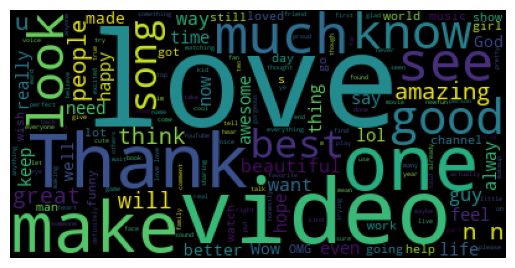

In [12]:
# Generate positive comments wordcloud
plt.imshow(wordcloud_pos)
plt.axis("off")

In [13]:
# Get keywords from all negative comments
wordcloud_neg = WordCloud(stopwords = set(STOPWORDS)).generate(all_negative_comments)

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

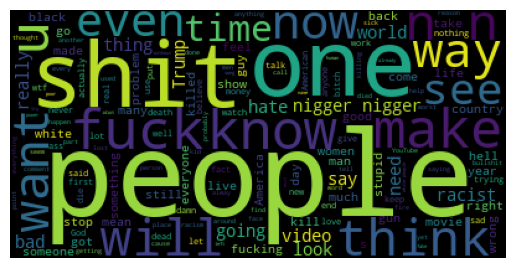

In [14]:
# Generate negative comments wordcloud
plt.imshow(wordcloud_neg)
plt.axis("off")

In [15]:
# Emoji analysis

# Get list of all emojis in comments
all_emojis = []

for comment in df['comment_text']:
    emoji_info = emoji.emoji_list(comment)
    emojis_found = [item['emoji'] for item in emoji_info]
    all_emojis.extend(emojis_found)

In [16]:
# Filter the top 10 most used emojis
emojis_count_list_top10 = Counter(all_emojis).most_common(10)

In [17]:
# Create a list of emojis with their respective counts
emojis = [emoji for emoji, _ in emojis_count_list_top10]
counts = [count for _, count in emojis_count_list_top10]

In [18]:
# Plot emoji frequency using Plotly
iplot([go.Bar(x = emojis, y = counts)])

In [19]:
# Compile multiple data sources

# Get all files in the additional_data directory
files = os.listdir(os.path.join("..", "data", "additional_data"))

In [20]:
# Get list of CSV files
files_csv = [file for file in files if file.endswith(".csv")]

In [21]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [22]:
# Create empty dataframe to hold all data
full_df = pd.DataFrame()

# Loop through all CSV files and concatenate them into a single dataframe
for file in files_csv:
    current_df = pd.read_csv(os.path.join("..", "data", "additional_data", file), encoding='iso-8859-1', on_bad_lines="skip")
    full_df = pd.concat([full_df, current_df], ignore_index=True)

In [23]:
full_df.shape

(375942, 16)

In [24]:
# Check for duplicate data
full_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
375937    False
375938    False
375939    False
375940    False
375941    False
Length: 375942, dtype: bool

In [25]:
full_df[full_df.duplicated()].shape

(36417, 16)

In [26]:
# Drop duplicated data
full_df = full_df.drop_duplicates()
full_df.shape

(339525, 16)

In [27]:
# Write a sample of the cleaned and compiled data to a CSV file
full_df[0:1000].to_csv(os.path.join("..", "data", "export_data", "youtube_sample.csv"), index=False)

In [28]:
# Write a sample of the cleaned and compiled data to a JSON file
full_df[0:1000].to_json(os.path.join("..", "data", "export_data", "youtube_sample.json"))

In [29]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///'+os.path.join("..", "data", "export_data", "youtube_sample.sqlite"))

# Write a sample of the cleaned and compiled data to a SQLite database
full_df[0:1000].to_sql('Users', con=engine, if_exists='append')

1000

In [30]:
# Category analysis

# Search dataframe for category column
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...


In [31]:
# Get unique category IDs
full_df["category_id"].unique()

array([24, 22, 25, 26, 10, 23, 17,  2,  1, 29, 27, 28, 20, 15, 19, 43, 30,
       44])

In [32]:
# Load JSON file containing category ID mappings
json_df = pd.read_json(os.path.join("..", "data", "additional_data", "US_category_id.json"))
json_df

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [33]:
# Sample items column
json_df["items"][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [34]:
# Create a dictionary to map category IDs to category names
category_dict = {}

for item in json_df["items"].values:
    category_dict[int(item["id"])] = item["snippet"]["title"]

In [35]:
category_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [36]:
# Create a new column in the dataframe with category names
full_df["category_name"] = full_df["category_id"].map(category_dict)
full_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,Entertainment
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,People & Blogs
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,News & Politics
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,News & Politics
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,Howto & Style
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375937,l884wKofd54,18.14.06,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,EnriqueIglesiasVEVO,10,2018-05-09T07:00:01.000Z,"Enrique Iglesias feat. Pitbull|""MOVE TO MIAMI""...",25066952,268088,12783,9933,https://i.ytimg.com/vi/l884wKofd54/default.jpg,False,False,False,NEW SONG - MOVE TO MIAMI feat. Pitbull (Click ...,Music
375938,IP8k2xkhOdI,18.14.06,Jacob Sartorius - Up With It (Official Music V...,Jacob Sartorius,10,2018-05-11T17:09:16.000Z,"jacob sartorius|""jacob""|""up with it""|""jacob sa...",1492219,61998,13781,24330,https://i.ytimg.com/vi/IP8k2xkhOdI/default.jpg,False,False,False,THE OFFICIAL UP WITH IT MUSIC VIDEO!Get my new...,Music
375939,Il-an3K9pjg,18.14.06,Anne-Marie - 2002 [Official Video],Anne-Marie,10,2018-05-08T11:05:08.000Z,"anne|""marie""|""anne-marie""|""2002""|""two thousand...",29641412,394830,8892,19988,https://i.ytimg.com/vi/Il-an3K9pjg/default.jpg,False,False,False,Get 2002 by Anne-Marie HERE â¶ http://ad.gt/2...,Music
375940,-DRsfNObKIQ,18.14.06,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,24,2018-05-08T20:32:32.000Z,"Eurovision Song Contest|""2018""|""Lisbon""|""Cypru...",14317515,151870,45875,26766,https://i.ytimg.com/vi/-DRsfNObKIQ/default.jpg,False,False,False,Eleni Foureira represented Cyprus at the first...,Entertainment


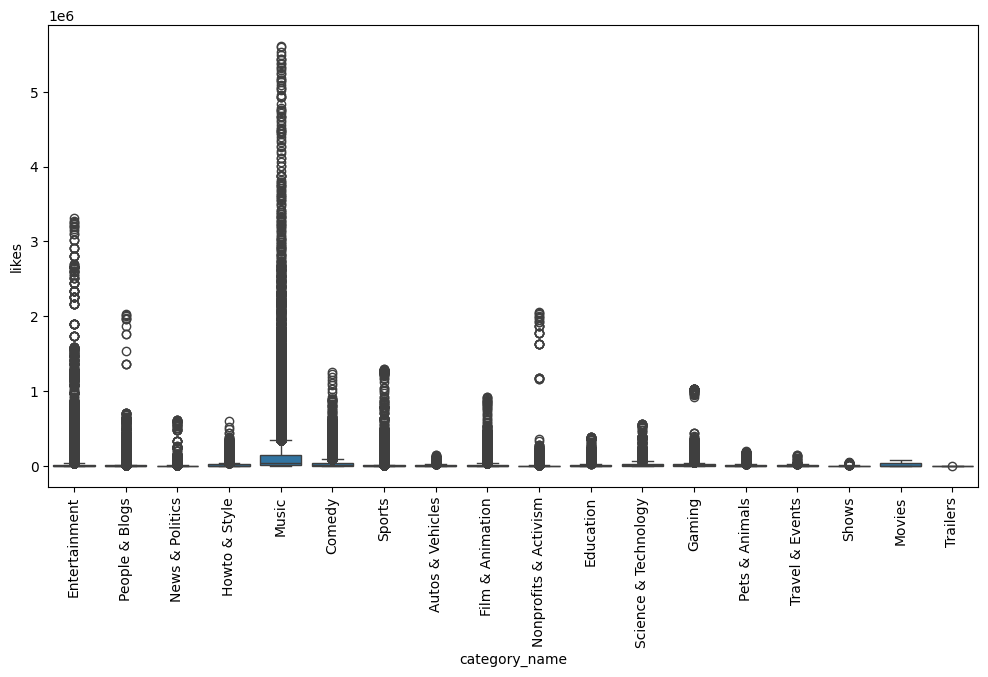

In [37]:
# Plot category distribution against likes using seaborn boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=full_df, x="category_name", y="likes")
plt.xticks(rotation="vertical")
plt.show()

In [38]:
# Engagement analysis

# Calculate engagement rates
full_df["like_rate"] = (full_df["likes"]/full_df["views"])*100
full_df["dislike_rate"] = (full_df["dislikes"]/full_df["views"])*100
full_df["comment_count_rate"] = (full_df["comment_count"]/full_df["views"])*100

In [39]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

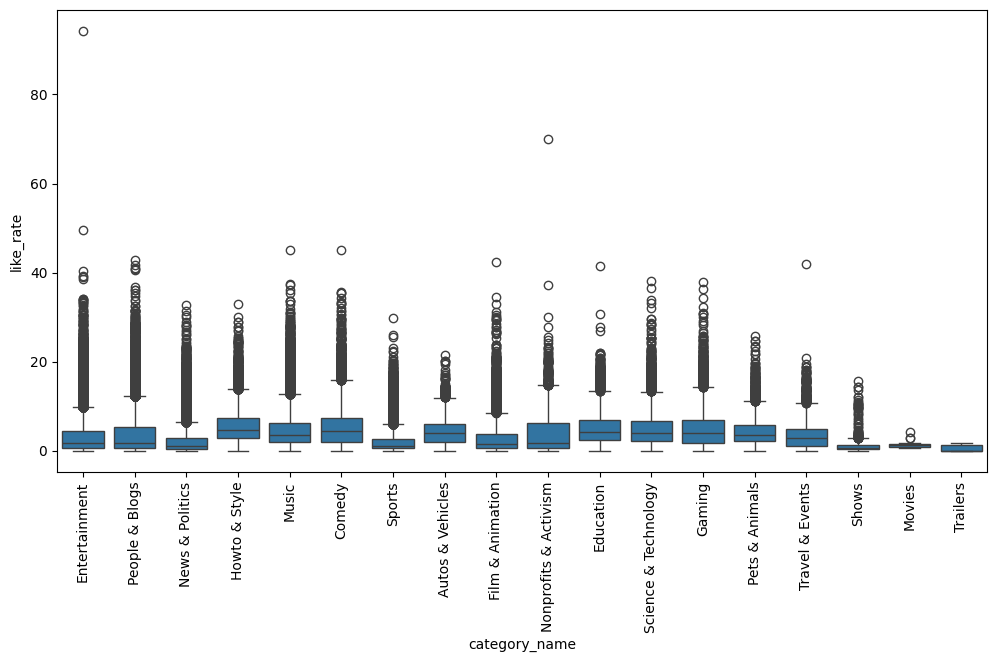

In [40]:
# Plot like rate against category using seaborn boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=full_df, x="category_name", y="like_rate")
plt.xticks(rotation="vertical")
plt.show()

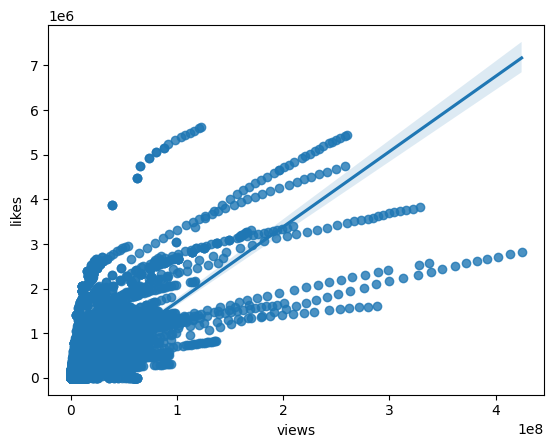

In [41]:
# Plot regression between views and likes using seaborn regplot
sns.regplot(data=full_df, x="views", y="likes")
plt.show()

In [42]:
# Show correlation matrix between views, likes, and dislikes
full_df[["views", "likes", "dislikes"]].corr()

,views,likes,dislikes
views,1.000000,0.779531,0.405428
likes,0.779531,1.000000,0.451809
dislikes,0.405428,0.451809,1.000000


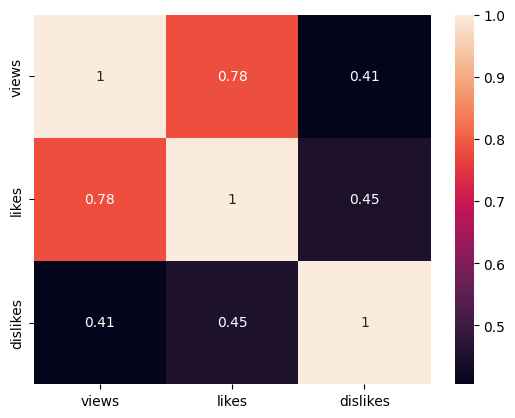

In [43]:
# Plot heatmap showing correlation matrix
sns.heatmap(full_df[["views", "likes", "dislikes"]].corr(), annot=True)
plt.show()

In [44]:
# Channel analysis

# Search dataframe for channel_title column
full_df.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,Entertainment,1.348467,0.116403,0.592010
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,People & Blogs,0.258164,0.165758,0.351522
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,News & Politics,7.426652,0.195496,0.446114
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,News & Politics,0.393123,0.177842,0.216322
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,Howto & Style,11.557009,0.136210,1.485704


In [45]:
# Create new dataframe showing number of videos per channel
cdf = full_df["channel_title"].value_counts().reset_index()
cdf

,channel_title,count
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,NZartreMexico,1
37820,æ¥æ¬ãã­éº»éé£ç,1
37821,ALERTA MUNDIAL,1
37822,å§« ch,1


In [46]:
cdf.rename(columns={"count": "total_videos"}, inplace=True)

In [47]:
import plotly.express as px

In [48]:
# Plot top 20 channels by number of videos using plotly
px.bar(cdf.head(20), x="channel_title", y="total_videos", title="Top 20 Channels by Number of Videos")

In [49]:
# Punctuation analysis

# Preview first video title
full_df["title"][0]

'CapÃ\xadtulo 12 | MasterChef 2017'

In [50]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [51]:
# Create a function that returns the count of punctuation characters in a given text
def punctuation_count(text):
    return len([char for char in text if char in string.punctuation])

In [52]:
# Apply the function to the title column and create a new column with the results
full_df["punctuation_count"] = full_df["title"].apply(punctuation_count)
full_df["punctuation_count"]

0         1
1         3
2         1
3         1
4         1
         ..
375937    4
375938    3
375939    4
375940    6
375941    5
Name: punctuation_count, Length: 339525, dtype: int64

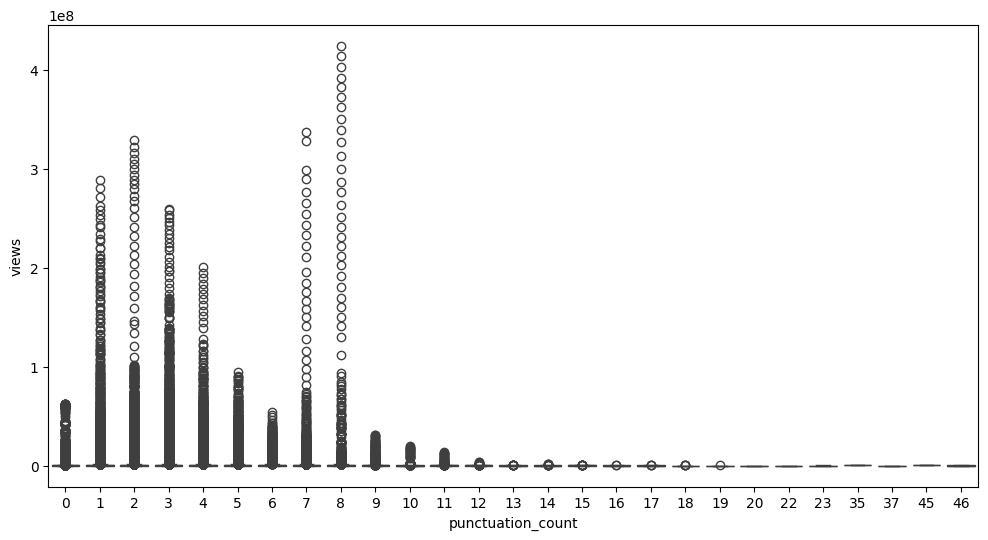

In [53]:
# Plot boxplot of punctuation count against views using seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=full_df, x="punctuation_count", y="views")
plt.show()

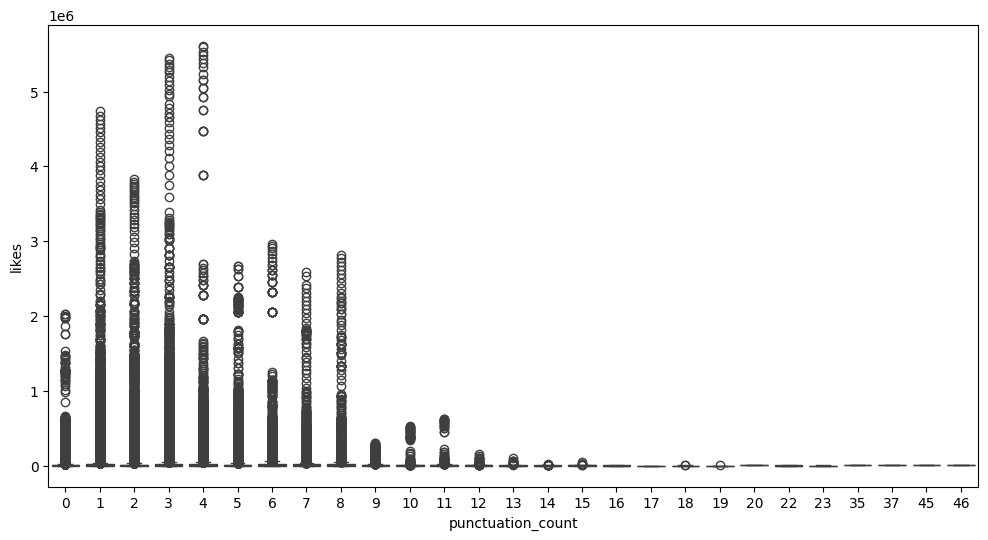

In [54]:
# Plot boxplot of punctuation count against likes using seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=full_df, x="punctuation_count", y="likes")
plt.show()